## `I. Data Cleaning & Preparation`

### Libraries

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
from math import radians, sin, cos, asin, sqrt

### Setting up raw dataset

In [2]:
# Main dataframe
raw_df = pd.read_csv('../data/amazon_delivery.csv')

In [3]:
# Set Order ID as df index
raw_df.set_index('Order_ID', inplace = True)

In [4]:
raw_df.head()

,Agent_Age,Agent_Rating,Store_Latitude,Store_Longitude,Drop_Latitude,Drop_Longitude,Order_Date,Order_Time,Pickup_Time,Weather,Traffic,Vehicle,Area,Delivery_Time,Category
Order_ID,,,,,,,,,,,,,,,
ialx566343618,37,4.9,22.745049,75.892471,22.765049,75.912471,2022-03-19,11:30:00,11:45:00,Sunny,High,motorcycle,Urban,120,Clothing
akqg208421122,34,4.5,12.913041,77.683237,13.043041,77.813237,2022-03-25,19:45:00,19:50:00,Stormy,Jam,scooter,Metropolitian,165,Electronics
njpu434582536,23,4.4,12.914264,77.678400,12.924264,77.688400,2022-03-19,08:30:00,08:45:00,Sandstorms,Low,motorcycle,Urban,130,Sports
rjto796129700,38,4.7,11.003669,76.976494,11.053669,77.026494,2022-04-05,18:00:00,18:10:00,Sunny,Medium,motorcycle,Metropolitian,105,Cosmetics
zguw716275638,32,4.6,12.972793,80.249982,13.012793,80.289982,2022-03-26,13:30:00,13:45:00,Cloudy,High,scooter,Metropolitian,150,Toys


### Cleaning NaN values

In [5]:
# NaN Agent_Ratings seem random
raw_df[raw_df['Agent_Rating'].isna()]

# NaN rows in Weather seem to have NaN values as well in Traffic and Order_Time
raw_df[raw_df['Weather'].isna()]
raw_df[raw_df['Order_Time'] == 'NaN ']

# Will drop all NaN values—seemingly no clear reason as to why Weather, Traffic, and Order_Time would have NaN values together
df = raw_df.dropna()

### Pickup & Dropoff distances

In [6]:
# Haversine Distance function
def haversine(lat1, lon1, lat2, lon2):
    lat1, lon1, lat2, lon2 = map(radians, [lat1, lon1, lat2, lon2])
    earth_radius = 6371
    dlat = lat2 - lat1
    dlon = lon2 - lon1

    dist = (2*earth_radius) * asin(sqrt((sin(dlat/2)**2) + (cos(lat1)*cos(lat2)*(sin(dlon/2)**2))))
    return dist


# Creating a column for Haversine Distance 
df.insert(6, 'Distance', df.apply(lambda x: haversine(x['Store_Latitude'], x['Store_Longitude'], x['Drop_Latitude'], x['Drop_Longitude']), axis = 1))


### Order_Time as time objects

In [7]:
# Turning Order_Time into Hour only
time_format = '%H:%M:%S'
df.insert((df.columns.tolist().index('Order_Time') + 1), 'Order_Time_h',
          pd.to_datetime(df['Order_Time'], format = time_format).dt.hour)

In [8]:
# Cyclical encoding for Order_Time_h (sin)
df.insert((df.columns.tolist().index('Order_Time_h') + 1), 'Order_Time_h_sin',
          np.sin(2 * np.pi * df['Order_Time_h']/24))

In [9]:
# Cyclical encoding for Order_Time_h (cos)
df.insert((df.columns.tolist().index('Order_Time_h_sin') + 1), 'Order_Time_h_cos',
          np.cos(2 * np.pi * df['Order_Time_h']/24))

### Reviewing the dataset's overall characteristics

In [10]:
df.head()

,Agent_Age,Agent_Rating,Store_Latitude,Store_Longitude,Drop_Latitude,Drop_Longitude,Distance,Order_Date,Order_Time,Order_Time_h,Order_Time_h_sin,Order_Time_h_cos,Pickup_Time,Weather,Traffic,Vehicle,Area,Delivery_Time,Category
Order_ID,,,,,,,,,,,,,,,,,,,
ialx566343618,37,4.9,22.745049,75.892471,22.765049,75.912471,3.025149,2022-03-19,11:30:00,11,0.258819,-9.659258e-01,11:45:00,Sunny,High,motorcycle,Urban,120,Clothing
akqg208421122,34,4.5,12.913041,77.683237,13.043041,77.813237,20.183530,2022-03-25,19:45:00,19,-0.965926,2.588190e-01,19:50:00,Stormy,Jam,scooter,Metropolitian,165,Electronics
njpu434582536,23,4.4,12.914264,77.678400,12.924264,77.688400,1.552758,2022-03-19,08:30:00,8,0.866025,-5.000000e-01,08:45:00,Sandstorms,Low,motorcycle,Urban,130,Sports
rjto796129700,38,4.7,11.003669,76.976494,11.053669,77.026494,7.790401,2022-04-05,18:00:00,18,-1.000000,-1.836970e-16,18:10:00,Sunny,Medium,motorcycle,Metropolitian,105,Cosmetics
zguw716275638,32,4.6,12.972793,80.249982,13.012793,80.289982,6.210138,2022-03-26,13:30:00,13,-0.258819,-9.659258e-01,13:45:00,Cloudy,High,scooter,Metropolitian,150,Toys


In [11]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 43594 entries, ialx566343618 to nsyz997960170
Data columns (total 19 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   Agent_Age         43594 non-null  int64  
 1   Agent_Rating      43594 non-null  float64
 2   Store_Latitude    43594 non-null  float64
 3   Store_Longitude   43594 non-null  float64
 4   Drop_Latitude     43594 non-null  float64
 5   Drop_Longitude    43594 non-null  float64
 6   Distance          43594 non-null  float64
 7   Order_Date        43594 non-null  object 
 8   Order_Time        43594 non-null  object 
 9   Order_Time_h      43594 non-null  int32  
 10  Order_Time_h_sin  43594 non-null  float64
 11  Order_Time_h_cos  43594 non-null  float64
 12  Pickup_Time       43594 non-null  object 
 13  Weather           43594 non-null  object 
 14  Traffic           43594 non-null  object 
 15  Vehicle           43594 non-null  object 
 16  Area              43594 n

In [12]:
df.loc[:, ['Weather', 'Traffic', 'Vehicle', 'Area', 'Category']].astype('category')

to_check = ['Weather', 'Traffic', 'Vehicle', 'Area', 'Category']
df.loc[df['Area'] == 'Metropolitian ', 'Area'] = 'Metropolitan'

for i in to_check:
    df.loc[:, i] = df.loc[:, i].str.strip()
    print(i, df[i].unique())

Weather ['Sunny' 'Stormy' 'Sandstorms' 'Cloudy' 'Fog' 'Windy']
Traffic ['High' 'Jam' 'Low' 'Medium']
Vehicle ['motorcycle' 'scooter' 'van']
Area ['Urban' 'Metropolitan' 'Semi-Urban' 'Other']
Category ['Clothing' 'Electronics' 'Sports' 'Cosmetics' 'Toys' 'Snacks' 'Shoes'
 'Apparel' 'Jewelry' 'Outdoors' 'Grocery' 'Books' 'Kitchen' 'Home'
 'Pet Supplies' 'Skincare']


## `II. EDA`

In [13]:
print(df.columns.tolist())
#df.describe()
df.head()

['Agent_Age', 'Agent_Rating', 'Store_Latitude', 'Store_Longitude', 'Drop_Latitude', 'Drop_Longitude', 'Distance', 'Order_Date', 'Order_Time', 'Order_Time_h', 'Order_Time_h_sin', 'Order_Time_h_cos', 'Pickup_Time', 'Weather', 'Traffic', 'Vehicle', 'Area', 'Delivery_Time', 'Category']


,Agent_Age,Agent_Rating,Store_Latitude,Store_Longitude,Drop_Latitude,Drop_Longitude,Distance,Order_Date,Order_Time,Order_Time_h,Order_Time_h_sin,Order_Time_h_cos,Pickup_Time,Weather,Traffic,Vehicle,Area,Delivery_Time,Category
Order_ID,,,,,,,,,,,,,,,,,,,
ialx566343618,37,4.9,22.745049,75.892471,22.765049,75.912471,3.025149,2022-03-19,11:30:00,11,0.258819,-9.659258e-01,11:45:00,Sunny,High,motorcycle,Urban,120,Clothing
akqg208421122,34,4.5,12.913041,77.683237,13.043041,77.813237,20.183530,2022-03-25,19:45:00,19,-0.965926,2.588190e-01,19:50:00,Stormy,Jam,scooter,Metropolitan,165,Electronics
njpu434582536,23,4.4,12.914264,77.678400,12.924264,77.688400,1.552758,2022-03-19,08:30:00,8,0.866025,-5.000000e-01,08:45:00,Sandstorms,Low,motorcycle,Urban,130,Sports
rjto796129700,38,4.7,11.003669,76.976494,11.053669,77.026494,7.790401,2022-04-05,18:00:00,18,-1.000000,-1.836970e-16,18:10:00,Sunny,Medium,motorcycle,Metropolitan,105,Cosmetics
zguw716275638,32,4.6,12.972793,80.249982,13.012793,80.289982,6.210138,2022-03-26,13:30:00,13,-0.258819,-9.659258e-01,13:45:00,Cloudy,High,scooter,Metropolitan,150,Toys


### Checking for outliers

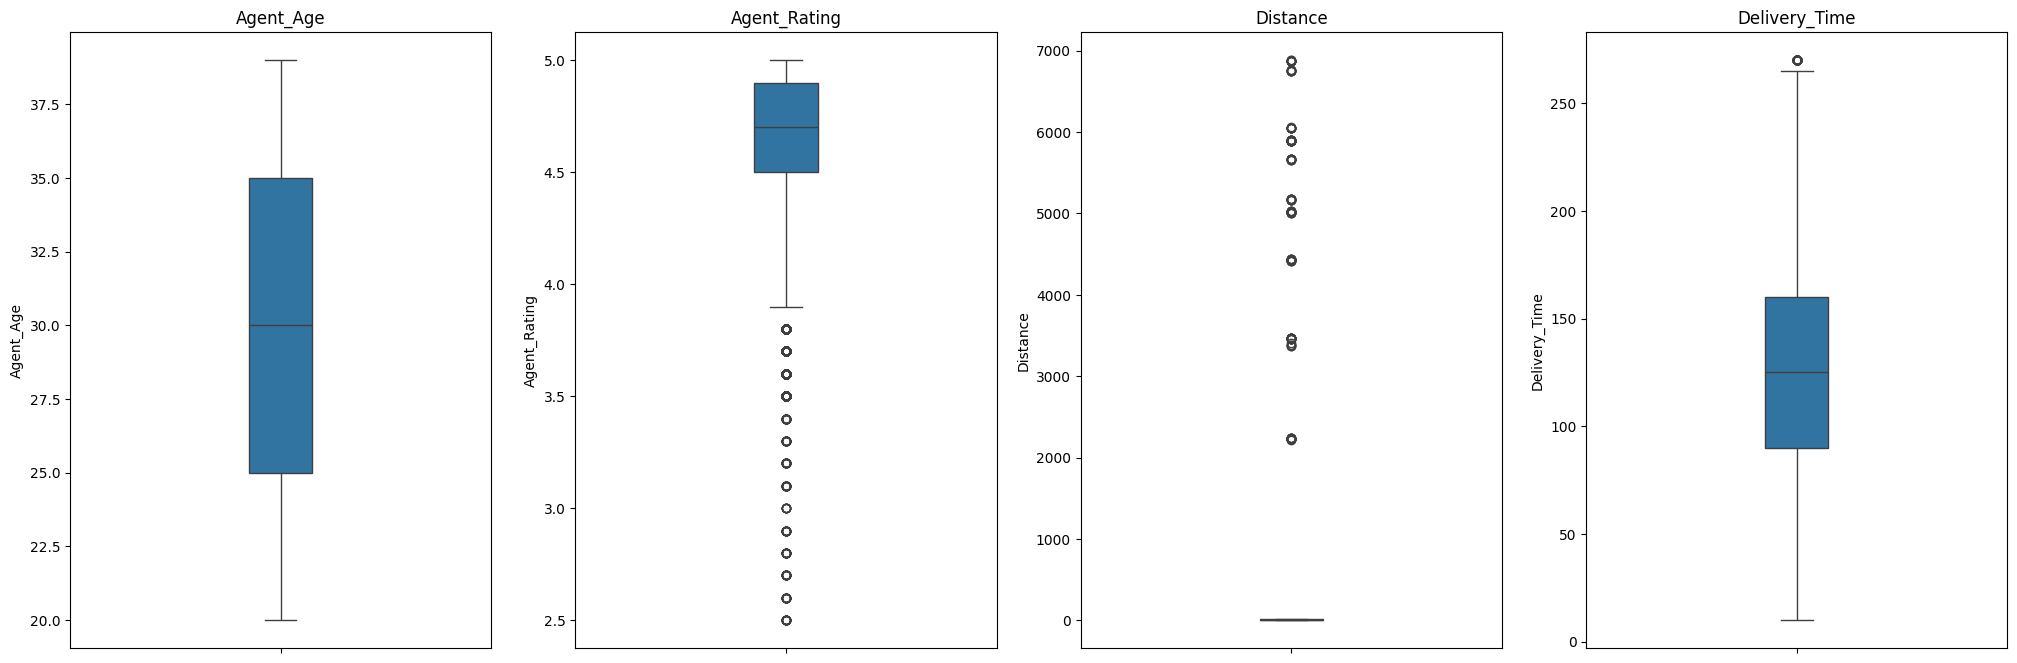

In [14]:
to_check = ['Agent_Age', 'Agent_Rating', 'Distance', 'Delivery_Time']

fig, axs = plt.subplots(1, 4, figsize = (25,8))
for i in range(4):
    sns.boxplot(df[to_check[i]], ax = axs[i], width = 0.15)
    axs[i].set_title(to_check[i])

# Significant outliers found in Distance—assuming that they are errors

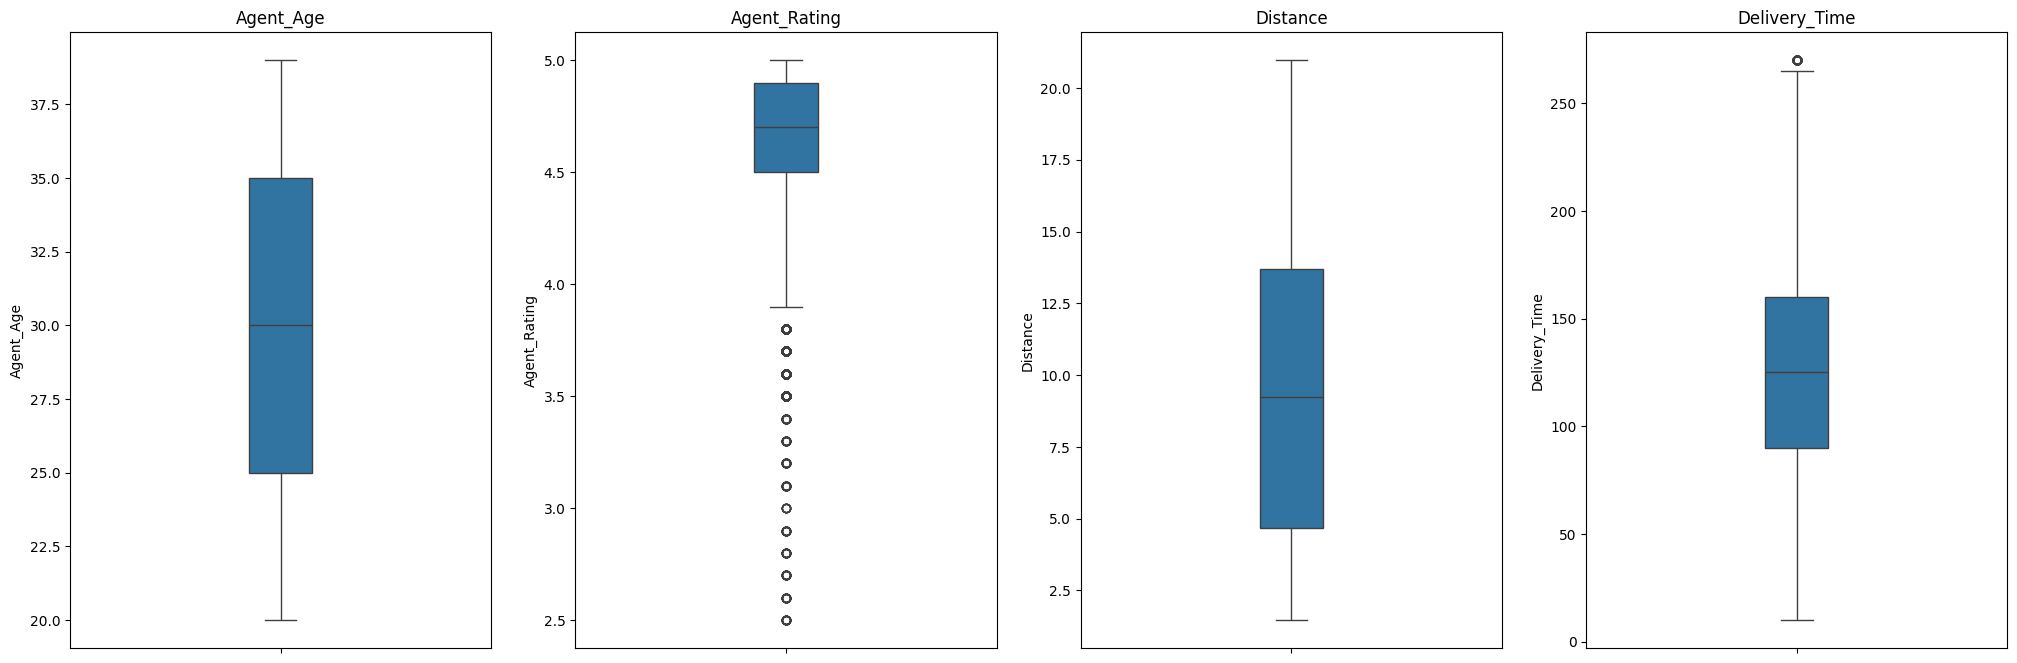

In [15]:
# Removing outliers in df['Distance']
q1 = df['Distance'].quantile(0.25)
q3 = df['Distance'].quantile(0.75)
iqr = q3 - q1

lower = q1 - (1.5 * iqr)
upper = q3 + (1.5 * iqr)

df = df[(df['Distance'] >= lower) & (df['Distance'] <= upper)]

fig, axs = plt.subplots(1, 4, figsize = (25,8))
for i in range(4):
    sns.boxplot(df[to_check[i]], ax = axs[i], width = 0.15)
    axs[i].set_title(to_check[i])

### EDA Questions

#### `1. How do delivery times vary based on weather?`

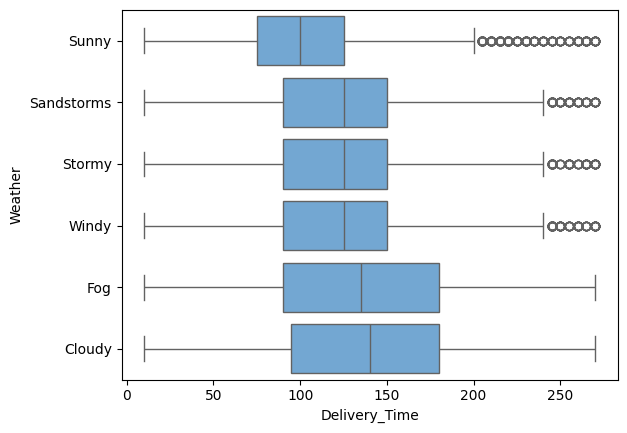

Weather
Sunny         100.0
Sandstorms    125.0
Stormy        125.0
Windy         125.0
Fog           135.0
Cloudy        140.0
Name: Delivery_Time, dtype: float64

In [16]:
sorter = df.groupby('Weather')['Delivery_Time'].median().sort_values(ascending = True).index.tolist()
df['Weather'] = pd.Categorical(df['Weather'], categories = sorter, ordered = True)
df_sorted = df.sort_values(by = 'Weather')

plt.figure()
sns.boxplot(data = df_sorted, x = 'Delivery_Time', y = 'Weather', color = "#63a9e2")
plt.show()

df_sorted.groupby(by = 'Weather', observed = True)['Delivery_Time'].median().sort_values(ascending = True)

> - Deliveries made in `Sunny` weather have the lowest median delivery time  
> - Deliveries made in `Sandstorms`, `Stormy`, and `Windy` weathers have the same median delivery times  
> - Deliveries made in `Cloudy` weather have the highest median delivery time, followed by `Fog`.

#### `2. How do delivery times vary based on traffic?`

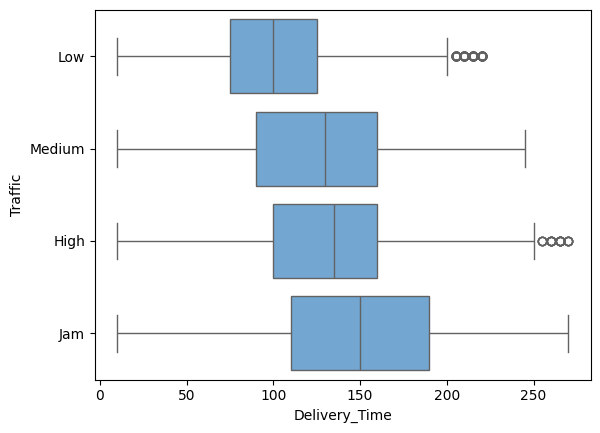

Traffic
Low       100.0
Medium    130.0
High      135.0
Jam       150.0
Name: Delivery_Time, dtype: float64

In [17]:
sorter = df.groupby('Traffic')['Delivery_Time'].median().sort_values(ascending = True).index.tolist()
df['Traffic'] = pd.Categorical(df['Traffic'], categories = sorter, ordered = True)
df_sorted = df.sort_values(by = 'Traffic')

plt.figure()
sns.boxplot(data = df_sorted, x = 'Delivery_Time', y = 'Traffic', color = '#63a9e2')
plt.show()

df_sorted.groupby(by = 'Traffic', observed = True)['Delivery_Time'].median().sort_values(ascending = True)

> As expected, median delivery times for the different `Traffic` categories increase from `Low` to `Jam`. 
> - Median delivery times...
>   - sharply increase between `Low` traffic and `Medium` traffic.
>   - barely increase between `Medium` traffic and `High` traffif.
>   - increase between `High` traffic and `Jam`.

#### `3. How do delivery times vary based on vehicle used?`

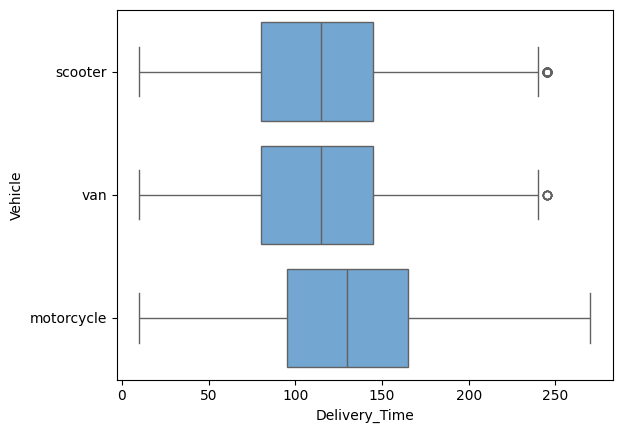

Vehicle
scooter       115.0
van           115.0
motorcycle    130.0
Name: Delivery_Time, dtype: float64

In [18]:
sorter = df.groupby('Vehicle')['Delivery_Time'].median().sort_values(ascending = True).index.tolist()
df['Vehicle'] = pd.Categorical(df['Vehicle'], categories = sorter, ordered = True)
df_sorted = df.sort_values(by = 'Vehicle')

plt.figure()
sns.boxplot(data = df_sorted, x = 'Delivery_Time', y = 'Vehicle', color = '#63a9e2')
plt.show()

df_sorted.groupby(by = 'Vehicle', observed = True)['Delivery_Time'].median().sort_values(ascending = True)

> Surprisingly, deliveries made via `scooter` and `van` have lower median delivery times vs those made via `motorcycle`—based on the dataset, these two vehicles are *usually* faster modes of transportation.

#### `4. How do delivery times vary based on area?`

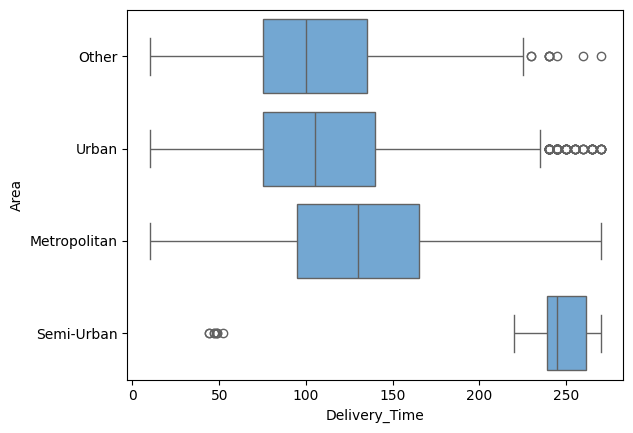

Area
Other           100.0
Urban           105.0
Metropolitan    130.0
Semi-Urban      245.0
Name: Delivery_Time, dtype: float64

In [19]:
sorter = df.groupby('Area')['Delivery_Time'].median().sort_values(ascending = True).index.tolist()
df['Area'] = pd.Categorical(df['Area'], categories = sorter, ordered = True)
df_sorted = df.sort_values(by = 'Area')

plt.figure()
sns.boxplot(data = df_sorted, x = 'Delivery_Time', y = 'Area', color = '#63a9e2')
plt.show()

df_sorted.groupby(by = 'Area', observed = True)['Delivery_Time'].median()

> Evidently, `Semi-Urban` deliveries have significantly higher `Delivery_Time` values compared to other areas. The difference between `Semi-Urban`'s median delivery time and the next highest median delivery time is `115`. The other three areas, relative to the `Semi-Urban` deliveries, have similar `Delivery_Time` values.

#### `5. How do delivery times vary based on distance?`

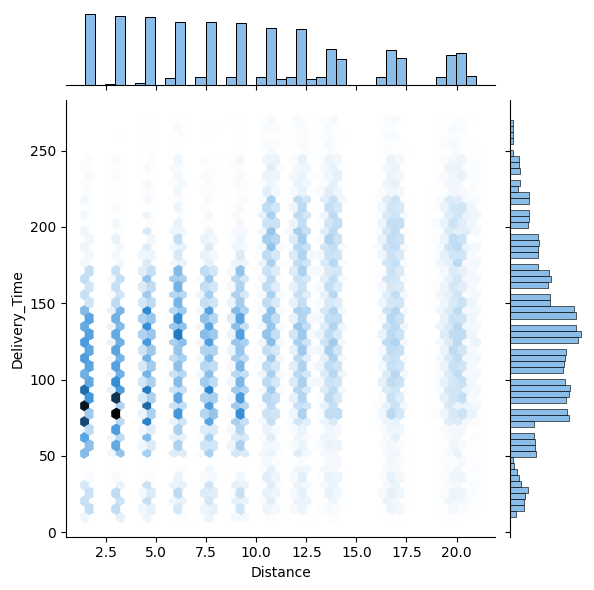

In [20]:
hex = sns.jointplot(data = df, x = 'Distance', y = 'Delivery_Time', kind = 'hex', color = "#63a9e2")
plt.show()


> High volume of datapoints are found between at `2.0 ≤ Distance ≤ 3.0` and `50 ≤ Delivery_Time ≤ 100`.

#### `6. How do delivery times vary based on the category of the item being delivered?`

#### `7. At what times are orders usually placed?`

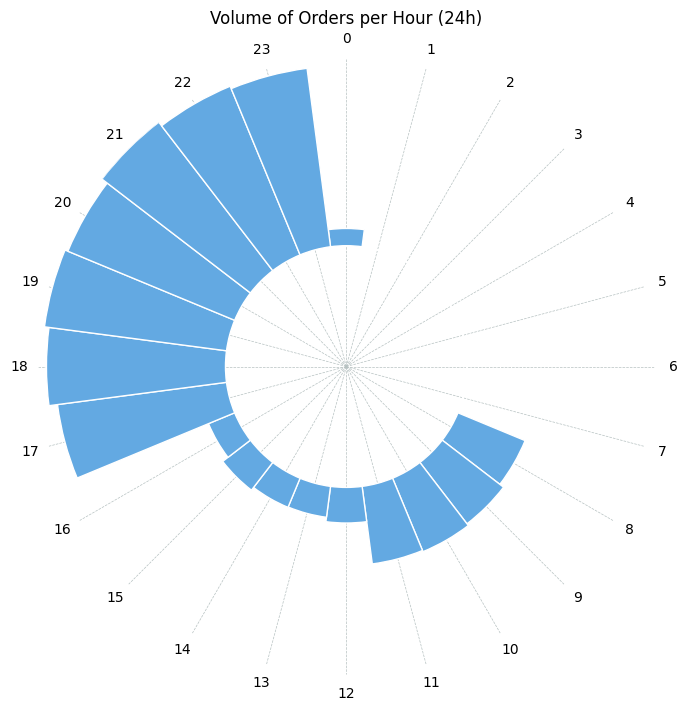

In [21]:
# Setting up Circular Barplot
data = pd.DataFrame({'Order_Time_h': list(range(24))}).merge( df['Order_Time_h'].value_counts().sort_index(ascending = True).reset_index() , on = 'Order_Time_h', how = 'left').fillna(0)

angles = np.linspace(0, 2 * np.pi, 24, endpoint = False)
labels = data['Order_Time_h'].values
values = data['count'].values.astype(int)

width = 2 * np.pi / len(values)
offset = np.pi/2

fig, ax = plt.subplots(figsize = (8,8), subplot_kw = {'projection': 'polar'})

ax.set_theta_offset(offset)
ax.set_theta_direction(-1)
ax.set_ylim(-3000, values.max())
ax.set_frame_on(False)

ax.grid(axis='x', linestyle='--', color="#B6C1C1", linewidth = 0.5)
ax.set_axisbelow(True)


ax.yaxis.grid(False)
ax.xaxis.grid(True)

ax.set_xticks(angles)
ax.set_xticklabels(labels)
ax.set_yticks([])

ax.bar(angles, values, width = width, linewidth = 1, edgecolor = "#ffffff", color = "#63a9e2")
ax.set_title('Volume of Orders per Hour (24h)')

plt.show()

> It can be seen that majority of the large-order-volume hours belong to the `17:00 to 23:00` group. Notably, **zero** orders were placed between `1:00 to 7:00`, showing that, oddly, there were no order made during the early morning.  
> This divide shows that for the majority of the day, a relatively small number of orders are made ``(0:00 to 16:00, 17 hours)``, and a large volume of orders are made in the rest of the ``7 hours`` of the day.

#### `8. Does delivery time vary based on what time of day an order was placed?`

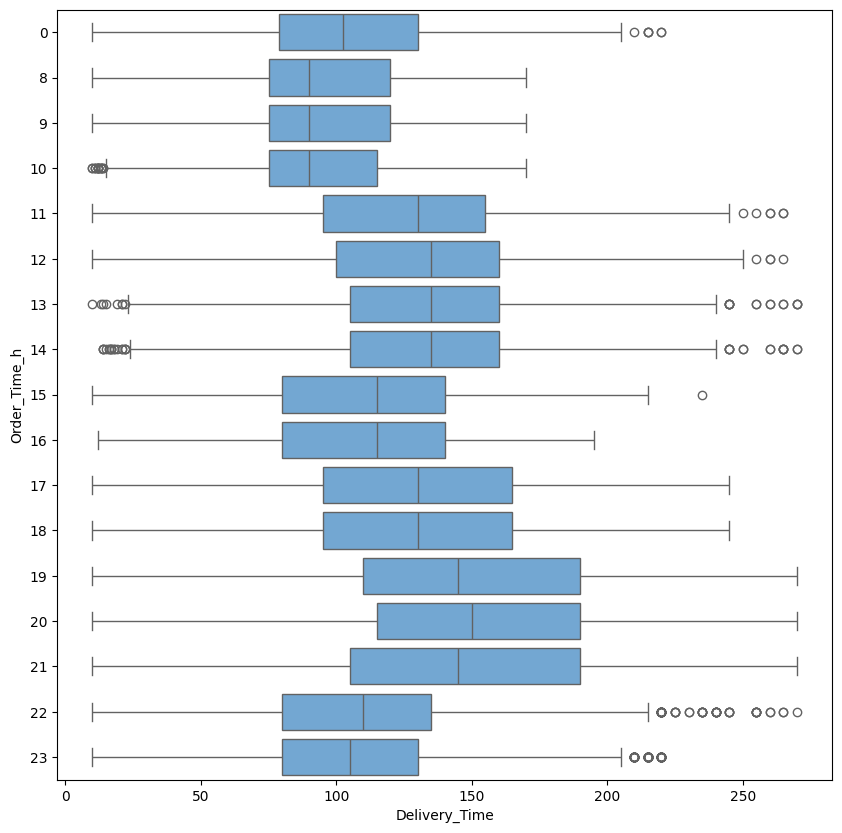

In [22]:
plt.figure(figsize = (10,10))
sns.boxplot(data = df, x = 'Delivery_Time', y = 'Order_Time_h', orient = 'y', color = '#63a9e2')
plt.show()

> Noticeably, median `delivery times` are higher (delivery takes longer) for orders placed at `11:00 to 14:00` and `19:00 to 21:00`, suggesting that orders placed during the `evening` and `early afternoon` may `take longer to deliver` compared to orders placed at other times.  
  
> The increase in median `delivery times` for orders placed at `17:00 to 21:00` coincides with the increase in order volumes for `17:00 to 23:00` shown in the previous visualization.

#### `9. Is there correlation present between Delivery_Time and Agent_Rating?`

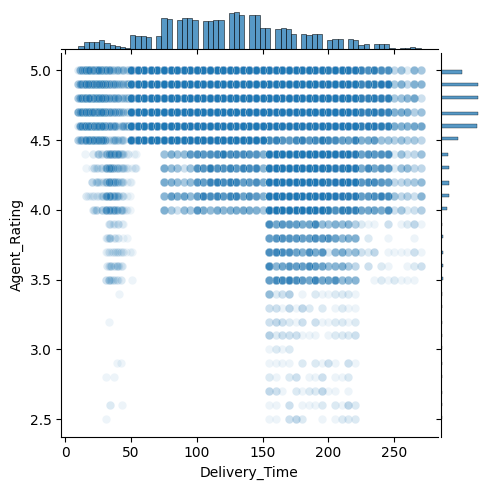

,Delivery_Time,Agent_Rating
Delivery_Time,1.000000,-0.307543
Agent_Rating,-0.307543,1.000000


In [23]:
data = df[['Delivery_Time', 'Agent_Rating']]

corr = data.corr(method = 'pearson')

hex = sns.jointplot(data = df, x = 'Delivery_Time', y = 'Agent_Rating', kind = 'scatter', space = 0.1, alpha = 0.08, height = 5, ratio = 9)
plt.show()

corr

> While the data distribution seems a bit odd (e.g. some ranges of `Delivery_Time` not having `Agent_Rating` values lower than 4.0), a negative correlation can be seen between the two variables. For example, `Agent_Rating` values lower than 3.5 become more common for `Delivery_Time` values exceeding 150.